In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

В футболе статистические функции могут представлять собой хорошо известные модели, такие как модель регрессии Пуассона или модель Диксона и Коулза.

 0   **id**                              - id матча     
 1   **общая информация**               - заголовок      
 2   **Дата**                           - дата
 3   **Команда1**                       - название команды хозяева  
 4   **счет1**                          - счет по истечению матча хозяев
 5   **Команда2**                       - название команды гости
 6   **счет2**                          - счет по истечению матча гости   
 7   **Температура**                    - темперетура    
 8   **Признак погоды**                 - признак погоды
 9   **поб1**                           -  коэфиценты для ставок     
 10  **X**                              -  коэфиценты для ставок     
 11  **поб2**                           -  коэфиценты для ставок     
 12  **ТМ 2.5**                         -  коэфиценты для ставок     
 13  **ТБ 2.5**                         -  коэфиценты для ставок     
 14  **Матчи 1**                        - кол-во матчей для статистики(удолить)
 15  **Матчи 2**                        - кол-во матчей для статистики(удолить)     
 16  **Отдых: дни (часы) 1**            -       
 17  **Отдых: дни (часы) 2**            -       
 18  **Победы 1**                       -       
 19  **Победы 2**                       -       
 20  **Ничьи 1**                        -       
 21  **Ничьи 2**                        -       
 22  **Поражения 1**                    -       
 23  **Поражения 2**                    -       
 24  **Забито голов 1**                 -       
 25  **Забито голов 2**                 -       
 26  **Пропущено голов 1**              -       
 27  **Пропущено голов 2**              -       
 28  **Забито голов за игру 1**         -       
 29  **Забито голов за игру 2**         -       
 30  **Пропущено голов за игру 1**      -       
 31  **Пропущено голов за игру 2**      -       
 32  **Сухие матчи 1**                  -       
 33  **Сухие матчи 2**                  -       
 34  **обе забьют 1**                   -       
 35  **обе забьют 2**                   -       
 36  **Тотал больше 2.5 1**             -       
 37  **Тотал больше 2.5 2**             -       
 38  **Тотал меньше 2.5 1**             -       
 39  **Тотал меньше 2.5 2**             -       
 40  **Удары 1**                        -       
 41  **Удары 2**                        -       
 42  **Удары  (соперник) 1**            -       
 43  **Удары  (соперник) 2**            -       
 44  **Удары в створ 1**                -       
 45  **Удары в створ 2**                -       
 46  **Удары в створ  (соперник) 1**    -       
 47  **Удары в створ  (соперник) 2**    -       
 48  **Владение 1**                     -       
 49  **Владение 2**                     -       
 50  **Владение  (соперник) 1**         -       
 51  **Владение  (соперник) 2**         -       
 52  **Угловые 1**                      -       
 53  **Угловые 2**                      -       
 54  **Угловые  (соперник) 1**          -       
 55  **Угловые  (соперник) 2**          -       
 56  **Нарушения 1**                    -       
 57  **Нарушения 2**                    -       
 58  **Нарушения  (соперник) 1**        -       
 59  **Нарушения  (соперник) 2**        -       
 60  **Офсайды 1**                      -       
 61  **Офсайды 2**                      -       
 62  **Офсайды  (соперник) 1**          -       
 63  **Офсайды  (соперник) 2**          -       
 64  **Желтые карточки 1**              -       
 65  **Желтые карточки 2**              -                      
 66  **Желтые карточки  (соперник) 1**  -       
 67  **Желтые карточки  (соперник) 2**  -       
 68  **Красные карточки 1**             -              
 69  **Красные карточки 2**             -       
 70  **Красные карточки  (соперник) 1** -       
 71  **Красные карточки  (соперник) 2** -       
 72  **тотал**                          - целевой признак     

In [2]:
bundes_22_23 = pd.read_csv("data/bundes_22-23.csv")
bundes_21_22 = pd.read_csv("data/bundes_21-22.csv")
liga_1_22_23 = pd.read_csv("data/liga_1_22-23.csv")
liga_1_21_22 = pd.read_csv("data/liga_1_21-22.csv")
Prem_Leag_22_23 = pd.read_csv("data/Prem_Leag_22-23.csv")
Prem_Leag_21_22 = pd.read_csv("data/Prem_Leag_21-22.csv")
Premiere_22_23 = pd.read_csv("data/Premiere_22-23.csv")
Premiere_21_22 = pd.read_csv("data/Premiere_21-22.csv")
bundus_2020_2021 = pd.read_csv("data_auto/bundus_2020-2021.csv")
bundus_2019_2020 = pd.read_csv("data_auto/bundus_2019-2020.csv")
Seria_A_21_22 = pd.read_csv("data_auto/Seria_A_2022-2023.csv")
Seria_A_22_23 = pd.read_csv("data_auto/Seria_A_21-22_notf.csv")

In [3]:
#df_b = pd.read_csv("data/bundes_22-23.csv")
#df_l = pd.read_csv("data/table_res_math_Prem_Leag_22-23.csv")
df = pd.concat([bundes_22_23,bundes_21_22,liga_1_22_23,liga_1_21_22,Prem_Leag_22_23,Prem_Leag_21_22,Premiere_22_23,Premiere_21_22,bundus_2020_2021,bundus_2019_2020,Seria_A_21_22,Seria_A_22_23])
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Матчи 1',axis=1)
df = df.drop('Матчи 2',axis=1)
df = df[df["счет1"] != '-']
df = df.reset_index().drop(['index'], axis = 1)

In [4]:
display(df.head())



,id,общая информация,Дата,Команда1,счет1,Команда2,счет2,Температура,Признак погоды,поб1,...,Офсайды (соперник) 1,Офсайды (соперник) 2,Желтые карточки 1,Желтые карточки 2,Желтые карточки (соперник) 1,Желтые карточки (соперник) 2,Красные карточки 1,Красные карточки 2,Красные карточки (соперник) 1,Красные карточки (соперник) 2
0,1736825,"Бундеслига, 1-й тур, регулярный сезон, 05.08.2...",05.08.2022 21:35,Айнтрахт Франкфурт,1,Бавария,6,+29°C,солнечно,6.50,...,2.00,2.5,0.88,1.90,1.00,1.50,0.0,0.10,0.25,0.0
1,1736826,"Бундеслига, 1-й тур, регулярный сезон, 06.08.2...",06.08.2022 19:30,Боруссия Дортмунд,1,Байер,0,+27°C,солнечно,2.13,...,1.63,1.0,0.75,0.89,1.25,1.00,0.0,0.00,0.00,0.0
2,1736827,"Бундеслига, 1-й тур, регулярный сезон, 06.08.2...",06.08.2022 16:30,Унион Берлин,3,Герта,1,+28°C,солнечно,1.87,...,0.67,2.0,1.20,1.75,0.80,0.75,0.0,0.25,0.00,0.0
3,1736828,"Бундеслига, 1-й тур, регулярный сезон, 07.08.2...",07.08.2022 18:30,Кёльн,3,Шальке,1,+30°C,солнечно,2.08,...,1.40,2.5,2.00,0.40,1.67,0.00,0.0,0.00,0.00,0.0
4,1736829,"Бундеслига, 1-й тур, регулярный сезон, 06.08.2...",06.08.2022 16:30,Боруссия М,3,Хоффенхайм,1,+27°C,солнечно,2.07,...,2.33,2.0,0.29,2.00,0.57,1.40,0.0,0.00,0.00,0.0


In [5]:
df = df.astype({'счет1': 'int32'})
df = df.astype({'счет2': 'int32'})

df["тотал"] = df["счет1"] + df["счет2"]
df["Дата"] = pd.to_datetime(df['Дата'],dayfirst=True)
df['Температура'] = df['Температура'].apply(lambda x: int(x[1:3]))
df['country'] = df['общая информация'].apply(lambda x: x.split()[0])

mask_1 = df["id"] == 14898101
df['Офсайды  (соперник) 2'][mask_1] = 4.00
df['Офсайды 2'][mask_1] = 1.00

df = df.astype({'Офсайды  (соперник) 2': 'float32'})
df = df.astype({'Офсайды 2': 'float32'})

df["Сухие матчи 1"] = df["Сухие матчи 1"].apply(lambda x: int(x.split()[-1]))
df["Сухие матчи 2"] = df["Сухие матчи 2"].apply(lambda x: int(x.split()[0]))

df["обе забьют 1"] = df["обе забьют 1"].apply(lambda x: int(x.split()[-1]))
df["обе забьют 2"] = df["обе забьют 2"].apply(lambda x: int(x.split()[0]))

df["Тотал больше 2.5 1"] = df["Тотал больше 2.5 1"].apply(lambda x: int(x.split()[-1]))
df["Тотал больше 2.5 2"] = df["Тотал больше 2.5 2"].apply(lambda x: int(x.split()[0]))

df["Тотал меньше 2.5 1"] = df["Тотал меньше 2.5 1"].apply(lambda x: int(x.split()[-1]))
df["Тотал меньше 2.5 2"] = df["Тотал меньше 2.5 2"].apply(lambda x: int(x.split()[0]))

df["Поражения 1"] = df["Поражения 1"].apply(lambda x: int(x.split()[-1]))
df["Поражения 2"] = df["Поражения 2"].apply(lambda x: int(x.split()[0]))

df["Ничьи 1"] = df["Ничьи 1"].apply(lambda x: int(x.split()[-1]))
df["Ничьи 2"] = df["Ничьи 2"].apply(lambda x: int(x.split()[0]))

df["Победы 1"] = df["Победы 1"].apply(lambda x: int(x.split()[-1]))
df["Победы 2"] = df["Победы 2"].apply(lambda x: int(x.split()[0]))

df["Отдых: дни (часы) 1"] = df["Отдых: дни (часы) 1"].apply(lambda x: float(x.split()[-1]))
df["Отдых: дни (часы) 2"] = df["Отдых: дни (часы) 2"].apply(lambda x: float(x.split()[0]))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15764\844337790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Офсайды  (соперник) 2'][mask_1] = 4.00
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15764\844337790.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Офсайды 2'][mask_1] = 1.00


In [6]:
fig = px.imshow(
    df.corr(),
    text_auto=True,
    height=1400,
    width=1400
)
fig.show()

In [7]:
df["Признак погоды"].value_counts()

переменная облачность                                       1675
солнечно                                                    1508
пасмурно                                                     298
небольшой дождь                                              267
ясно                                                         233
в отдельных районах умеренный или сильный дождь с грозой     121
умеренный дождь                                               52
облачно                                                       43
умеренный или сильный ливневый дождь                          36
в отдельных районах местами небольшой дождь с грозой          34
сильный дождь                                                 33
временами умеренный дождь                                     13
сильные ливни                                                  9
дымка                                                          6
Name: Признак погоды, dtype: int64

<AxesSubplot: >

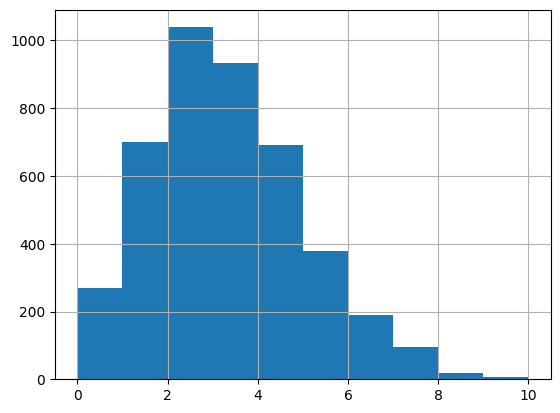

In [8]:
df["тотал"].hist()

In [9]:
visual = pd.pivot_table(df,
                        values="тотал",
                        index="country",
                        columns="Признак погоды",
                        aggfunc='mean')
fig2 = px.imshow(visual,
                 title='Тепловая карта зависимости тотал от country и Признак погоды',
                 height=600,
                 width=800,
                 text_auto=True)
fig2.show()

In [10]:
res_tab = df.groupby('Признак погоды')['тотал'].mean().sort_values(ascending=False)
fig = px.bar(res_tab)
fig.show()

In [11]:
df["Отдых: дни (часы) 1"].value_counts()


7.0     611
2.8     250
6.0     220
3.0     167
3.8     162
       ... 
24.8      1
21.9      1
11.9      1
2.1       1
18.0      1
Name: Отдых: дни (часы) 1, Length: 146, dtype: int64

In [12]:
types = df.dtypes
cat_features = list(types[(types == "object")].index)
cat_features

['общая информация', 'Команда1', 'Команда2', 'Признак погоды', 'country']

In [13]:
df['Отдых: дни (часы) 1'].value_counts()

7.0     611
2.8     250
6.0     220
3.0     167
3.8     162
       ... 
24.8      1
21.9      1
11.9      1
2.1       1
18.0      1
Name: Отдых: дни (часы) 1, Length: 146, dtype: int64

In [14]:
df['Победы 1'].value_counts()

3     820
4     818
5     684
2     612
6     523
7     302
1     282
8     139
0      76
9      58
10     14
Name: Победы 1, dtype: int64

In [15]:
df['Победы 2'].value_counts()

4     886
3     775
5     720
2     557
6     502
7     312
1     303
8     129
0      71
9      63
10     10
Name: Победы 2, dtype: int64

In [16]:
df["обе забьют 1"].value_counts()

6     984
5     963
4     788
7     618
3     369
8     321
2     144
9     105
1      17
10     16
0       3
Name: обе забьют 1, dtype: int64

In [17]:
df["Офсайды 1"].value_counts()

2.00    305
1.50    213
1.80    200
1.70    188
1.00    156
       ... 
2.64      1
1.91      1
0.43      1
4.75      1
4.20      1
Name: Офсайды 1, Length: 126, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4328 entries, 0 to 4327
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4328 non-null   int64         
 1   общая информация                4328 non-null   object        
 2   Дата                            4328 non-null   datetime64[ns]
 3   Команда1                        4328 non-null   object        
 4   счет1                           4328 non-null   int32         
 5   Команда2                        4328 non-null   object        
 6   счет2                           4328 non-null   int32         
 7   Температура                     4328 non-null   int64         
 8   Признак погоды                  4328 non-null   object        
 9   поб1                            4328 non-null   float64       
 10  X                               4328 non-null   float64       
 11  поб2

In [19]:
df["Ничьи 1"].value_counts()

2    1213
3     999
1     964
4     534
0     378
5     189
6      42
7       8
8       1
Name: Ничьи 1, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4328 entries, 0 to 4327
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4328 non-null   int64         
 1   общая информация                4328 non-null   object        
 2   Дата                            4328 non-null   datetime64[ns]
 3   Команда1                        4328 non-null   object        
 4   счет1                           4328 non-null   int32         
 5   Команда2                        4328 non-null   object        
 6   счет2                           4328 non-null   int32         
 7   Температура                     4328 non-null   int64         
 8   Признак погоды                  4328 non-null   object        
 9   поб1                            4328 non-null   float64       
 10  X                               4328 non-null   float64       
 11  поб2